In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


%matplotlib inline

In [379]:
df = pd.read_csv("data.csv")


In [380]:
df.shape

(9529, 19)

In [381]:
df.head(2)

,Unnamed: 0,team,name,position,age,appearance,goals,assists,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,position_grouped,minutes_played_median
0,1,Manchester United,Jack Butland,Goalkeeper,30.0,15,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,Goalkeeper,1304.0
1,2,Manchester United,Tom Heaton,Goalkeeper,37.0,4,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,Goalkeeper,292.0


In [382]:
df.drop(['minutes_played_median'],axis=1,inplace=True)

In [383]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Unnamed: 0,team,name,position,age,appearance,goals,assists,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,position_grouped


In [384]:
df.isnull().sum()

Unnamed: 0          0
team                0
name                0
position            0
age                 0
appearance          0
goals               0
assists             0
goals conceded      0
clean sheets        0
minutes played      0
days_injured        0
games_injured       0
award               0
current_value       0
highest_value       0
position_encoded    0
position_grouped    0
dtype: int64

In [385]:
df.dtypes

Unnamed: 0            int64
team                 object
name                 object
position             object
age                 float64
appearance            int64
goals               float64
assists             float64
goals conceded      float64
clean sheets        float64
minutes played        int64
days_injured          int64
games_injured         int64
award                 int64
current_value         int64
highest_value         int64
position_encoded      int64
position_grouped     object
dtype: object

In [386]:

# Convert categorical variables using OneHotEncoding
categorical_features = ['team', 'position']
numeric_features = ['age', 'goals', 'assists', 'goals conceded']

In [387]:
for i in numeric_features:
    print (df[i].value_counts())

age
22.000000    758
23.000000    743
26.000000    737
25.000000    698
24.000000    692
21.000000    644
28.000000    608
29.000000    586
27.000000    583
20.000000    548
30.000000    538
31.000000    430
19.000000    373
32.000000    368
33.000000    316
34.000000    219
18.000000    195
35.000000    145
36.000000    120
37.000000     71
17.000000     67
38.000000     28
16.000000     17
39.000000     15
26.041903     13
40.000000     11
15.000000      6
Name: count, dtype: int64
goals
0.000000    4121
0.324910       7
0.250000       6
0.230769       6
0.426540       6
            ... 
0.290047       1
0.565593       1
0.089109       1
0.045531       1
0.312139       1
Name: count, Length: 4534, dtype: int64
assists
0.000000    4281
0.174081       6
0.100784       6
0.142857       5
0.116279       5
            ... 
0.072144       1
0.127298       1
0.238305       1
0.269623       1
0.208333       1
Name: count, Length: 4312, dtype: int64
goals conceded
0.000000    8569
1.000000   

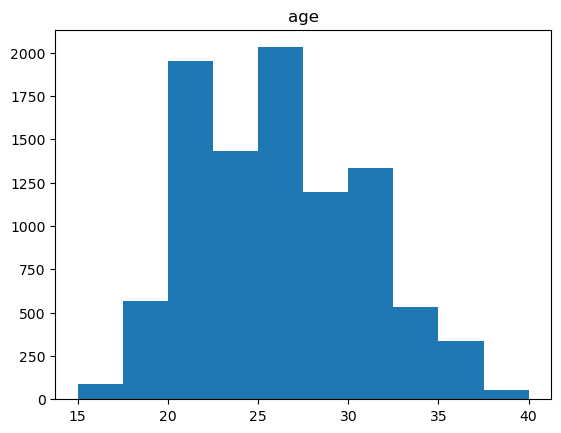

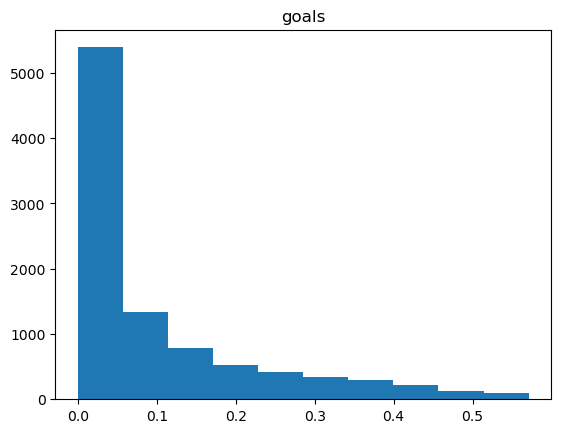

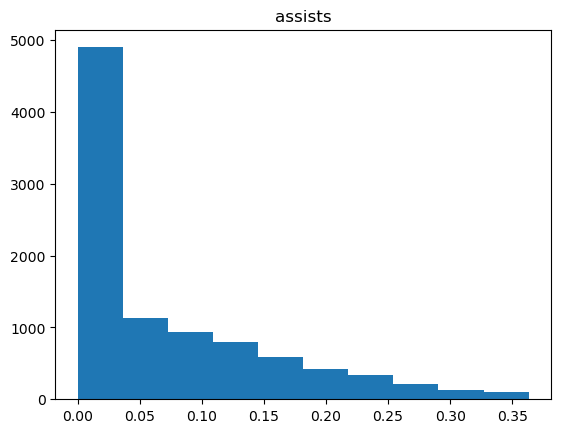

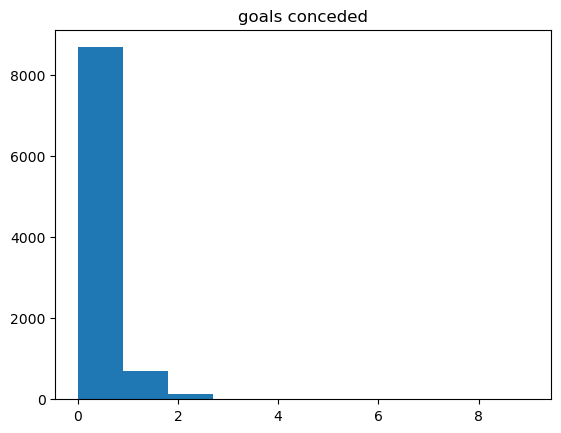

In [388]:
for i in numeric_features:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

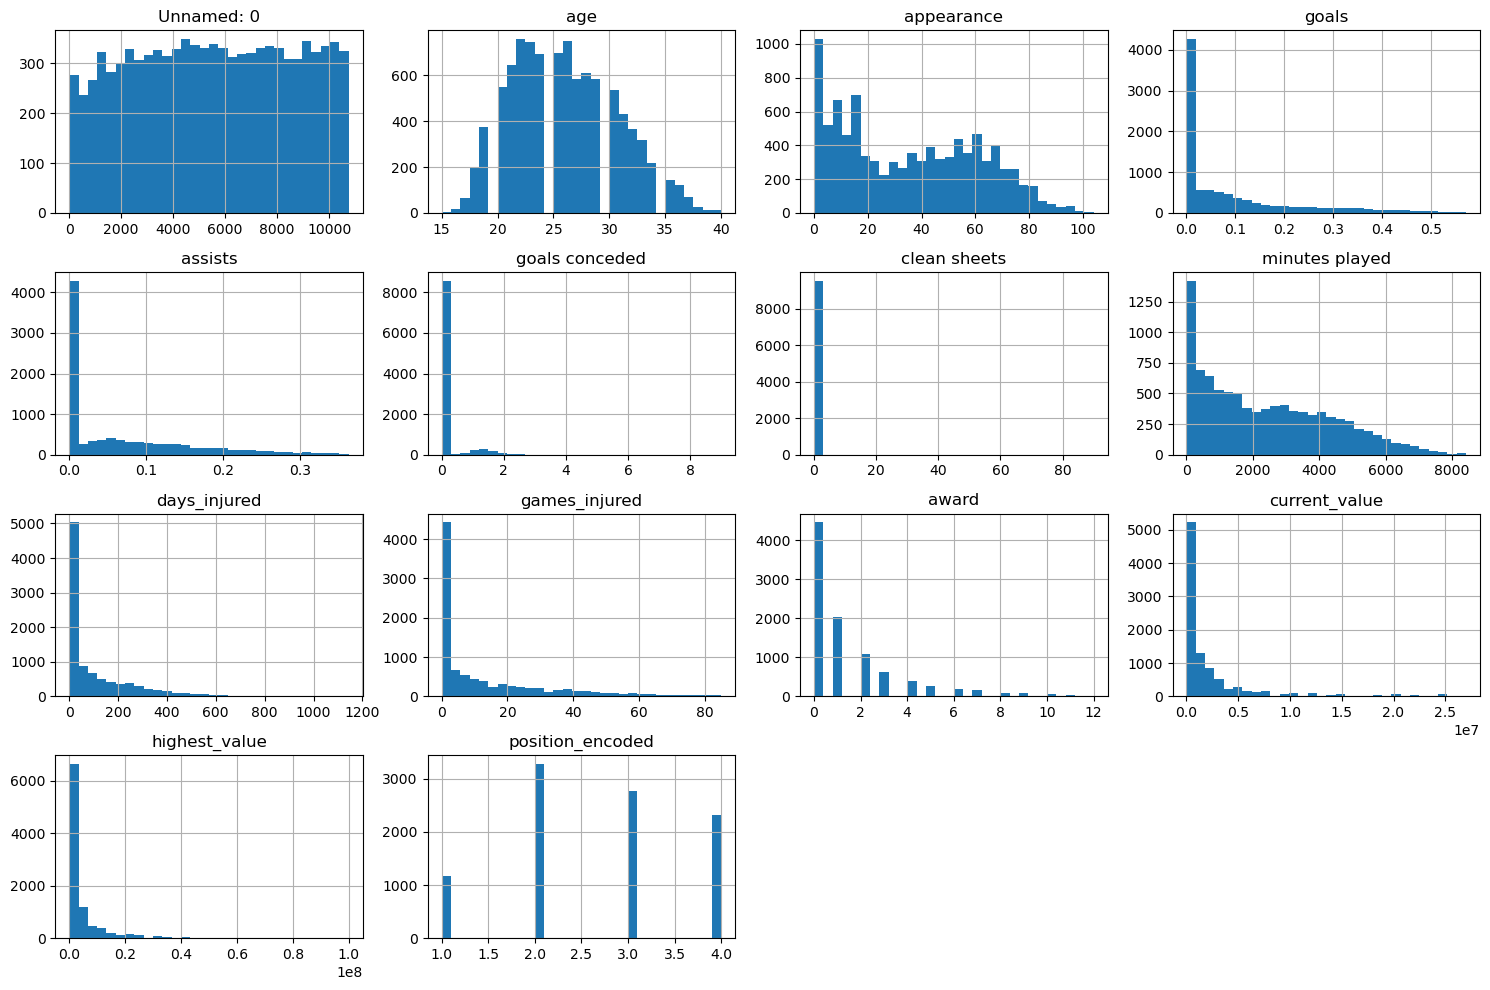

In [389]:
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

In [390]:
# only use numeric data in my model!
numeric_data = df.select_dtypes(include=[np.number])

correlation = numeric_data.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value       1.000000
highest_value       0.781221
appearance          0.453880
minutes played      0.438638
assists             0.227056
award               0.202847
games_injured       0.178456
goals               0.176177
days_injured        0.148958
position_encoded    0.082440
clean sheets       -0.016167
age                -0.052531
goals conceded     -0.078045
Unnamed: 0         -0.459109
Name: current_value, dtype: float64


In [391]:
# Set the correlation threshold
threshold = 0.2

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['Unnamed: 0', 'appearance', 'assists', 'minutes played', 'award',
       'current_value', 'highest_value'],
      dtype='object')

In [392]:
selected_features = ['highest_value','current_value', 'appearance', 'minutes played', 'award', 'assists', 'goals','position_encoded']

In [393]:
df.dtypes

Unnamed: 0            int64
team                 object
name                 object
position             object
age                 float64
appearance            int64
goals               float64
assists             float64
goals conceded      float64
clean sheets        float64
minutes played        int64
days_injured          int64
games_injured         int64
award                 int64
current_value         int64
highest_value         int64
position_encoded      int64
position_grouped     object
dtype: object

In [394]:
df = df[selected_features]
df.head(3)

,highest_value,current_value,appearance,minutes played,award,assists,goals,position_encoded
0,22000000,1500000,15,1304,1,0.0,0.000000,1
1,6000000,600000,4,292,4,0.0,0.000000,1
2,70000000,25000000,68,4762,1,0.0,0.037799,2


In [395]:
X = df[selected_features]
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [396]:
model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()


In [397]:
param_grid = {
    'alpha': [ 0, 0.000001,0.0001, 0.001, 0.01, 0.1, 1 ]  # Regularization strength
}
grid_search = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

In [398]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [399]:
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [400]:
lasso_model.fit(X_train_scaled, y_train)


Lasso()

In [401]:
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0, 1e-06, 0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [402]:
grid_search_lasso.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


/Users/wadiahalbuhairi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/wadiahalbuhairi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/wadiahalbuhairi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/wadiahalbuhairi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 1e-06, 0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='neg_mean_squared_error', verbose=1)

## Test the Model

In [403]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)


In [404]:
#Ridge & Lasso regularization
y_pred_ridge = ridge_model.predict(X_train_scaled)

In [405]:
y_pred_lasso = lasso_model.predict(X_train_scaled)


In [406]:
# Best hyperparameter
print("Best parameters found 'Ridge': ", grid_search.best_params_)

# Best model
best_ridge = grid_search.best_estimator_

Best parameters found 'Ridge':  {'alpha': 0}


In [407]:
# Best hyperparameter
print("Best parameters found 'Lasso': ", grid_search_lasso.best_params_)

# Best model
best_ridge = grid_search_lasso.best_estimator_

Best parameters found 'Lasso':  {'alpha': 1}


In [408]:
y_pred_ridge_cv = best_ridge.predict(X_train_scaled)


## Interpretation of the Model


In [409]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
highest_value,4.062269e-08
current_value,4.200375e+06
appearance,-1.950595e-09
minutes played,1.120635e-10
award,-1.487579e-09
assists,-3.643376e-11
goals,-3.211276e-10
position_encoded,-3.691117e-10


In [410]:
model.intercept_

2370334.5139708775

In [411]:
# Ridge & Lasso regularization
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
highest_value,3.384634e+02
current_value,4.200229e+06
appearance,-4.910844e+03
minutes played,4.482703e+03
award,1.029572e+01
assists,3.004559e+02
goals,1.682556e+02
position_encoded,5.906494e+02


In [412]:
coeff_df = pd.DataFrame(ridge_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
highest_value,1.233284e+03
current_value,4.198746e+06
appearance,-1.919061e+02
minutes played,4.463382e+02
award,-1.558874e+02
assists,7.438418e+01
goals,2.091626e+01
position_encoded,1.583968e+01


In [413]:
coeff_df = pd.DataFrame(best_ridge.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
highest_value,3.384634e+02
current_value,4.200229e+06
appearance,-4.910844e+03
minutes played,4.482703e+03
award,1.029572e+01
assists,3.004559e+02
goals,1.682556e+02
position_encoded,5.906494e+02


 Mean Square Error

In [414]:
y_base = [y_train.mean()] * len(y_test)

In [415]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'MSE for of base model : {mse_base}')

MSE for of base model : 17940161195144.867


In [416]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'MSE for training: {mse_train}')
print(f'MSE for testing: {mse_test}')

MSE for training: 8.332922172221012e-16
MSE for testing: 1.094163294166125e-15


Mean Absolute Error

In [417]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 2597997.930477421


In [418]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 1.4778744137601466e-08
Mean Absolute Error for testing: 1.5945845173138262e-08


Root Mean Absolute Error

In [419]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1611.8306146979032


In [420]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 2.886680129876016e-08
Root Mean Squared Error for testing: 3.3078139218615744e-08


R Square

In [421]:

r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 1.0
R Square for testing: 1.0


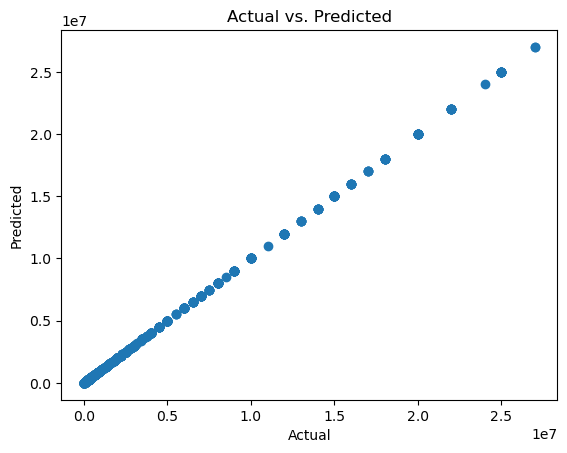

In [423]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()